# Polynomial Regression

Initially we will generate non-linear data based on a simple quadratic equation:

$$y = ax^{2} + bx + c$$

Additionally, we added some noise.


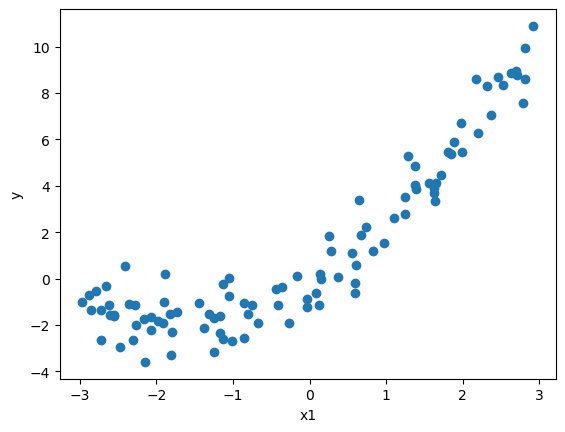

In [4]:
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 * X + np.random.randn(m , 1)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y');

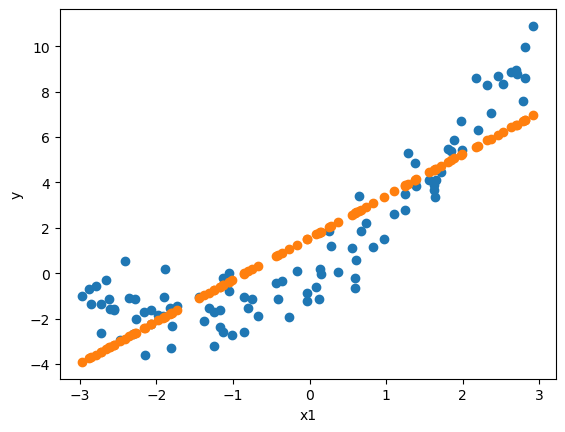

In [2]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

previsoes = linear_reg.predict(X)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, previsoes)
plt.xlabel('x1')
plt.ylabel('y');

As we can see a straight line will not correctly accommodate this data. Then we can use the PolynomialFeatures functionality to transform our training data by squaring the values (2nd degree polynomial).

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


`X_poly` contains the original characteristic of `X` plus the square of this characteristic. This way we can fit a linear regression model.

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression()

In [9]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

[-0.21865419]
[[1.93366893 0.56456263]]


In [10]:
previsoes = linear_reg.predict(X_poly)

In [11]:
len(X_poly)

100

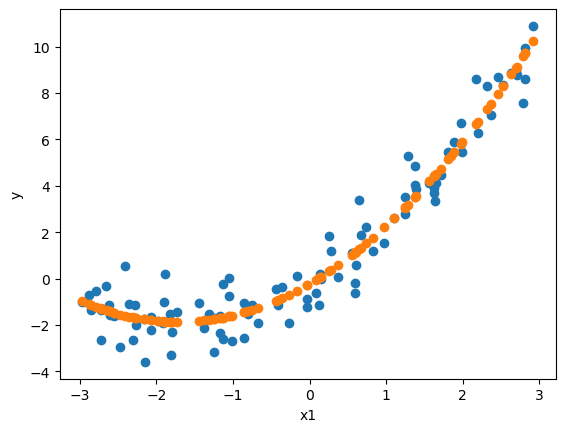

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.scatter(X, previsoes)
plt.xlabel('x1')
plt.ylabel('y');

It is important that polynomial regression is able to find relationships between them (something that a simple linear regression model cannot do).

This is possible because `PolynomialFeatures` also adds all combinations of features up to the given degree.

For example, if there were two features `a` and `b` and `degree=3`, the following features would be created: $a^{2}$, $a^{3}$, $b^{2}$ , $b^{3}$, $ab$, $a^{2}b$ and $ab^{2}$.

**Attention: be careful with the combinatorial explosion of the number of features.**

# Example with Multiple Regression

In [14]:
import numpy as np
import pandas as pd

np.random.seed(42)
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X2 = 3.2 * np.random.rand(m, 1) - 1

y = 1.3 * X1 ** 2 + 0.5 * X ** 2 + 2 * X1 * X2 + np.random.randn(m , 1)

df = pd.DataFrame({
    'x1': X1.ravel(),
    'x2': X2.ravel(),
    'y': y.ravel()
})
df.head()

,x1,x2,y
0,-0.752759,-0.899427,1.694043
1,2.704286,1.036513,19.002002
2,1.391964,0.005939,3.797220
3,0.591951,0.627426,0.659190
4,-2.063888,1.904213,1.672952


In [15]:
# training a model using only existing features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop('y', axis=1).copy()
y = df['y'].copy()

linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)

r2_score(y, y_pred)

0.06014739226422172

In [16]:
# adding interaction features
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = pd.DataFrame(poly_features.fit_transform(X), columns=['x1', 'x2', 'x1_quadrado', 'x1x2', 'x2_quadrado'])
X_poly.head()

,x1,x2,x1_quadrado,x1x2,x2_quadrado
0,-0.752759,-0.899427,0.566647,0.677052,0.808968
1,2.704286,1.036513,7.313162,2.803028,1.074360
2,1.391964,0.005939,1.937563,0.008267,0.000035
3,0.591951,0.627426,0.350406,0.371406,0.393664
4,-2.063888,1.904213,4.259634,-3.930082,3.626026


In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression()

In [18]:
r2_score(y, linear_reg.predict(X_poly))

0.9756123530206587

We can observe that, as expected, the model fit the data much better than the previous one without the interaction features.

# Hyperparameter

In [20]:
import pandas as pd
import numpy as np

In [21]:
features = pd.read_excel("temps.xlsx")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [24]:
features = pd.get_dummies(features)
# Replace True with 1 and False with 0
features = features.replace({True: 1, False: 0})

features.head()

,year,month,day,temp_2,temp_1,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,0,0,0,0,0,1,0


In [26]:
labels = np.array(features["actual"])

features = features.drop("actual", axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [27]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

In [45]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics

### GradientBoostingRegressor

In [46]:
gbr = GradientBoostingRegressor(n_estimators = 100)
gbr.fit(train_features, train_labels)
gbr_pred = gbr.predict(test_features)

In [51]:
r_sq = gbr.score(test_features, test_labels)

print("r^2:", r_sq)
print("MAE:", metrics.mean_absolute_error(test_labels, gbr_pred))
print("MSE:", metrics.mean_squared_error(test_labels, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, gbr_pred)))

r^2: 0.7948943450162462
MAE: 4.078342558198712
MSE: 28.523804162208883
RMSE: 5.340768124737198


### Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV


parameters = {'learning_rate': [0.03],
                  'subsample'    : [0.2],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [8]
                 }

grid_search = GridSearchCV(gbr, parameters, scoring='r2', cv=2, n_jobs=-1)

In [56]:
grid_search.fit(train_features, train_labels)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.2)

 The best score across ALL searched params:
 0.8357238778882864

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.2}


In [57]:
best_model = grid_search.best_estimator_

In [58]:
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.2,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
grb_tunned = GradientBoostingRegressor(alpha = 0.9,  ccp_alpha = 0.0,
 criterion = 'friedman_mse',
 init = None,
 learning_rate = 0.03,
 loss = 'squared_error',
 max_depth = 8,
 max_features = None,
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_iter_no_change = None,
 random_state = None,
 subsample = 0.2,
 tol = 0.0001,
 validation_fraction = 0.1,
 verbose = 0,
 warm_start = False)
grb_tunned.fit(train_features, train_labels)
gbr_tunned_pred = grb_tunned.predict(test_features)

In [60]:
# Calculate the absolute errors
errors_gbr = abs(gbr_tunned_pred - test_labels)

# Print out the mean absolute error (mae)
r_sq = grb_tunned.score(test_features, test_labels)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', metrics.mean_absolute_error(test_labels, gbr_tunned_pred))
print('MSE:', metrics.mean_squared_error(test_labels, gbr_tunned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, gbr_tunned_pred)))

Coeficiente de Determinação (R²): 0.8069778024653622
MAE: 4.037290345014361
MSE: 26.84337183132911
RMSE: 5.181058948837498
